In [1]:
# 라이브러리 불러오기
import os
import pandas as pd
import numpy as np
import time

In [3]:
df_test = pd.read_csv('C:/Users/phj/Desktop/vscode/train.csv')
# 다음과 같은 경고는 column에 NaN값이나 여러 type데이터가 섞여 있을 때 나타나는 경고
# 경고대로 dtpye을 명시해주거나 low_memory = False를 입력하면 된다. 혹은 불러온 다음에 데이터를 다룰 때 참고사항으로 해두면 된다고 함
# low_memory 옵션, 
# 대용량의 데이터를 불러오는 경우 각 칼럼의 데이터 타입(dtype)을 추측하는 것이 매우 많은 메모리를 사용하기 때문에
# 대용량의 데이터를 불러올때 메모리 에러가 발생하는 경우 이를 False로 설정할 것을 권장한다.

C:\Users\phj\AppData\Local\Temp\ipykernel_9516\347549129.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv('C:/Users/phj/Desktop/vscode/train.csv')


In [4]:
df = pd.read_csv('C:/Users/phj/Desktop/vscode/train.csv', low_memory = False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   channelGrouping       903653 non-null  object
 1   date                  903653 non-null  int64 
 2   device                903653 non-null  object
 3   fullVisitorId         903653 non-null  object
 4   geoNetwork            903653 non-null  object
 5   sessionId             903653 non-null  object
 6   socialEngagementType  903653 non-null  object
 7   totals                903653 non-null  object
 8   trafficSource         903653 non-null  object
 9   visitId               903653 non-null  int64 
 10  visitNumber           903653 non-null  int64 
 11  visitStartTime        903653 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 82.7+ MB


- **channelGrouping** : 사이트에 들어온 경로
- **fullVisitorId**  : 유저별로 그룹화 할 때 사용 가능
- **date** : 사이트 방문일(날짜 데이터)
- **device** : 접속한 브라우저 명
- **geoNetwork** : 접속 지역
- **totals** : 페이지 방문 횟수 등 로그 데이터
- **trafficSource** : 세션이 시작된 트래픽 출처
- **visitNumber** : 같은 유저의 방문 횟수 누적 표시
- **visitStartTime** : 방문 시작 시간(초단위)(Posix time)

In [5]:
# 해당 값 전체 보기
# pd.set_option('display.max_colwidth', None)

# 출력 옵션 초기화 (선택사항)
# pd.reset_option('display.max_colwidth')

In [6]:
# pd.reset_option('display.max_colwidth')
df.tail(3)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
903650,Social,20170104,"{""browser"": ""Android Webview"", ""browserVersion...",5744576632396406899,"{""continent"": ""Asia"", ""subContinent"": ""Eastern...",5744576632396406899_1483526434,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""24"", ""pageviews"": ""21...","{""referralPath"": ""/yt/about/ko/"", ""campaign"": ...",1483526434,1,1483526434
903651,Social,20170104,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",2709355455991750775,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",2709355455991750775_1483592857,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""24"", ""pageviews"": ""22...","{""referralPath"": ""/l.php"", ""campaign"": ""(not s...",1483592857,1,1483592864
903652,Social,20170104,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",0814900163617805053,"{""continent"": ""Americas"", ""subContinent"": ""Cen...",0814900163617805053_1483574474,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""31"", ""pageviews"": ""31...","{""referralPath"": ""/yt/about/es-419/"", ""campaig...",1483574474,1,1483574474


In [7]:
# 해당 값 전체 보기
# pd.set_option('display.max_colwidth', None)
print(df[['device']][:2])
print(df[['totals']][:2])
print(df[['trafficSource']][:2])
# 열 안의 값들이 json 형식으로 입력되어 있음
# 어떻게 분리해서 볼 수 있을지 고민하다가 다른 분들은 어떻게 했는지 참고했더니
# 결국 데이터를 분석하기 위해서는 이를 분리할 필요가 있다.

                                              device
0  {"browser": "Chrome", "browserVersion": "not a...
1  {"browser": "Firefox", "browserVersion": "not ...
                                              totals
0  {"visits": "1", "hits": "1", "pageviews": "1",...
1  {"visits": "1", "hits": "1", "pageviews": "1",...
                                       trafficSource
0  {"campaign": "(not set)", "source": "google", ...
1  {"campaign": "(not set)", "source": "google", ...


- json형식으로 입력된 열들을 분리시켜 다시 df 불러오기 (방법 : kaggle 다른 분의 코드 참고)

In [24]:
import os 
import pandas as pd
import numpy as np
import json #json 형식 다루는 라이브러리
from pandas import json_normalize

def load_df(csv_path='C:/Users/phj/Desktop/vscode/train.csv', nrows=None): # None은 모든 행의 데이터를 불러오기를 뜻함
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important! 부분에서 str형식으로 바꿔서 보라고 언급
                     nrows=nrows)
    # converters : 각 column에 해당하는 값에 json.loads 함수를 실행하여 다른 형태로 변환하여 불러온다는 의미 
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column]) # json_normalize : JSON 데이터를 평평한(flat) 테이블 형태로 변환해주는 함수
        column_as_df.columns = [f"{column}_{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

In [11]:
train_df = load_df()

Loaded train.csv. Shape: (903653, 55)


In [28]:
train_df.columns


,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,...,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adContent,trafficSource_campaignCode
903650,Social,20170104,5744576632396406899,5744576632396406899_1483526434,Not Socially Engaged,1483526434,1,1483526434,Android Webview,not available in demo dataset,...,not available in demo dataset,NaN,/yt/about/ko/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903651,Social,20170104,2709355455991750775,2709355455991750775_1483592857,Not Socially Engaged,1483592857,1,1483592864,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,/l.php,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903652,Social,20170104,0814900163617805053,0814900163617805053_1483574474,Not Socially Engaged,1483574474,1,1483574474,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,/yt/about/es-419/,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### POSIX시간을 UTC시간으로 바꾸는 작업

In [13]:
# 데이터프레임에 한 열의 값을 바꾸기 위해서 def함수를 만들고 apply 적용
import pandas as pd
import datetime #날짜와 시간을 다루는 라이브러리
import pytz #다양한 시간대를 처리하기 위해 사용하는 라이브러리

# Posix 시간을 utc 시간으로 변환하는 함수
def posix_to_utc(visitStartTime):
    utc_time = datetime.datetime.utcfromtimestamp(visitStartTime)
    return utc_time

# Posix 시간을 UTC 지정한 로컬 시간대로 변환하는 함수
def posix_to_utc_local(visitStartTime):
    utc_time = datetime.datetime.utcfromtimestamp(visitStartTime) #posix -> utc시간대로
    local_timezone = pytz.timezone('America/New_York')  # 지역 시간대
    return utc_time.astimezone(local_timezone) # 그 지역 시간대로 변환


In [38]:
train_df['utc_local_time'] = train_df['visitStartTime'].apply(posix_to_utc)

In [39]:
train_df[['date','utc_local_time']]

,date,utc_local_time
0,20160902,2016-09-02 15:33:05
1,20160902,2016-09-03 05:22:27
2,20160902,2016-09-03 01:16:26
3,20160902,2016-09-03 05:40:13
4,20160902,2016-09-02 13:23:20
...,...,...
903648,20170104,2017-01-04 18:32:30
903649,20170104,2017-01-04 15:29:58
903650,20170104,2017-01-04 10:40:34
903651,20170104,2017-01-05 05:07:44


In [44]:
# 모든 컬럼 출력 
pd.set_option('display.max_columns', None)
train_df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_isMobile,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_language,device_screenColors,device_screenResolution,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_networkLocation,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adContent,trafficSource_campaignCode,utc_local_time
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-02 15:33:05
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-03 05:22:27
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-03 01:16:26
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,not 

In [50]:
selected_columns = ['channelGrouping', 'utc_local_time','fullVisitorId', 'visitNumber', 
                    'device_browser', 'device_operatingSystem', 'device_operatingSystemVersion', 
                    'device_deviceCategory', 'geoNetwork_continent', 'geoNetwork_subContinent', 
                    'geoNetwork_country', 'totals_visits', 'totals_hits', 'totals_pageviews', 
                    'totals_bounces', 'totals_newVisits', 'totals_transactionRevenue', 
                    'trafficSource_campaign', 'trafficSource_source', 'trafficSource_medium', 
                    'trafficSource_keyword', 'trafficSource_campaignCode']

selected_df = train_df[selected_columns]
print(selected_df)

       channelGrouping      utc_local_time        fullVisitorId  visitNumber  \
0       Organic Search 2016-09-02 15:33:05  1131660440785968503            1   
1       Organic Search 2016-09-03 05:22:27   377306020877927890            1   
2       Organic Search 2016-09-03 01:16:26  3895546263509774583            1   
3       Organic Search 2016-09-03 05:40:13  4763447161404445595            1   
4       Organic Search 2016-09-02 13:23:20    27294437909732085            2   
...                ...                 ...                  ...          ...   
903648          Social 2017-01-04 18:32:30  5123779100307500332            1   
903649          Social 2017-01-04 15:29:58  7231728964973959842            1   
903650          Social 2017-01-04 10:40:34  5744576632396406899            1   
903651          Social 2017-01-05 05:07:44  2709355455991750775            1   
903652          Social 2017-01-05 00:01:14  0814900163617805053            1   

         device_browser device_operatin

In [51]:
selected_df.head(3)

,channelGrouping,utc_local_time,fullVisitorId,visitNumber,device_browser,device_operatingSystem,device_operatingSystemVersion,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_campaignCode
0,Organic Search,2016-09-02 15:33:05,1131660440785968503,1,Chrome,Windows,not available in demo dataset,desktop,Asia,Western Asia,Turkey,1,1,1,1,1,NaN,(not set),google,organic,(not provided),NaN
1,Organic Search,2016-09-03 05:22:27,377306020877927890,1,Firefox,Macintosh,not available in demo dataset,desktop,Oceania,Australasia,Australia,1,1,1,1,1,NaN,(not set),google,organic,(not provided),NaN
2,Organic Search,2016-09-03 01:16:26,3895546263509774583,1,Chrome,Windows,not available in demo dataset,desktop,Europe,Southern Europe,Spain,1,1,1,1,1,NaN,(not set),google,organic,(not provided),NaN


### Nun값 0으로 대체하기

In [52]:
# NuN 값 0으로 대체하기
selected_df.fillna(0, inplace=True)

selected_df.head(3)

C:\Users\phj\AppData\Local\Temp\ipykernel_9516\2250220180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.fillna(0, inplace=True)


,channelGrouping,utc_local_time,fullVisitorId,visitNumber,device_browser,device_operatingSystem,device_operatingSystemVersion,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_campaignCode
0,Organic Search,2016-09-02 15:33:05,1131660440785968503,1,Chrome,Windows,not available in demo dataset,desktop,Asia,Western Asia,Turkey,1,1,1,1,1,0,(not set),google,organic,(not provided),0
1,Organic Search,2016-09-03 05:22:27,377306020877927890,1,Firefox,Macintosh,not available in demo dataset,desktop,Oceania,Australasia,Australia,1,1,1,1,1,0,(not set),google,organic,(not provided),0
2,Organic Search,2016-09-03 01:16:26,3895546263509774583,1,Chrome,Windows,not available in demo dataset,desktop,Europe,Southern Europe,Spain,1,1,1,1,1,0,(not set),google,organic,(not provided),0


### Heatmap 그리기

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

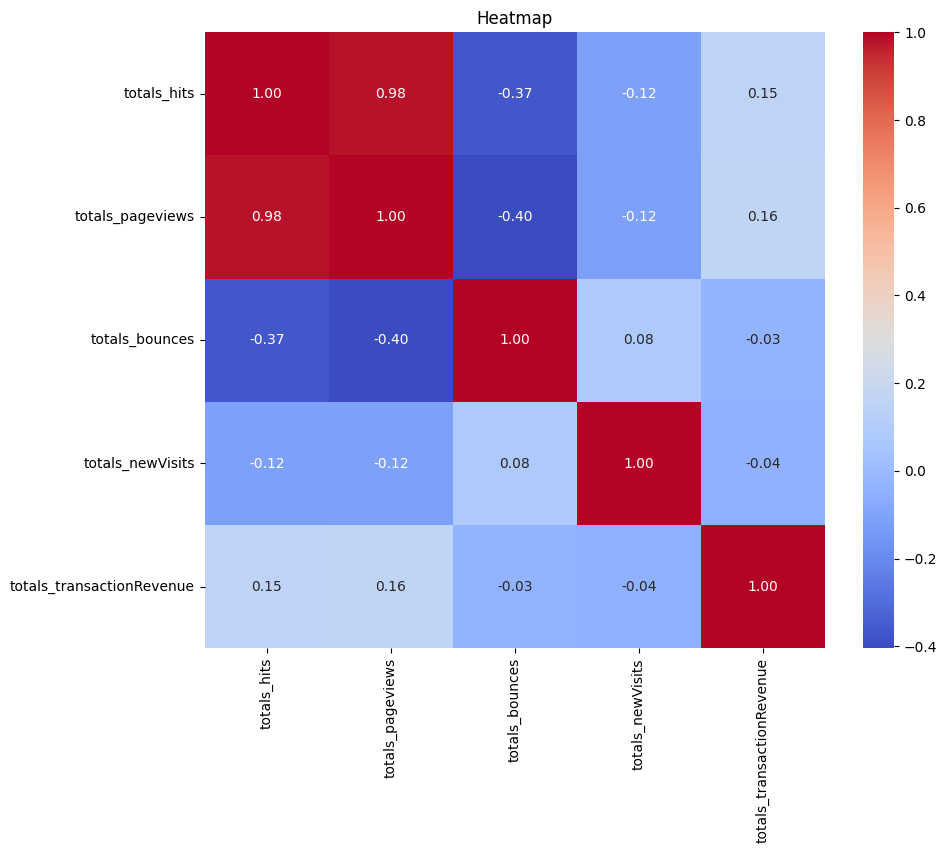

In [60]:
heatmap_data = selected_df[['totals_hits', 'totals_pageviews', 'totals_bounces', 'totals_newVisits', 'totals_transactionRevenue']].corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap')
plt.show()

### Channel Grouping 기준 막대그래프

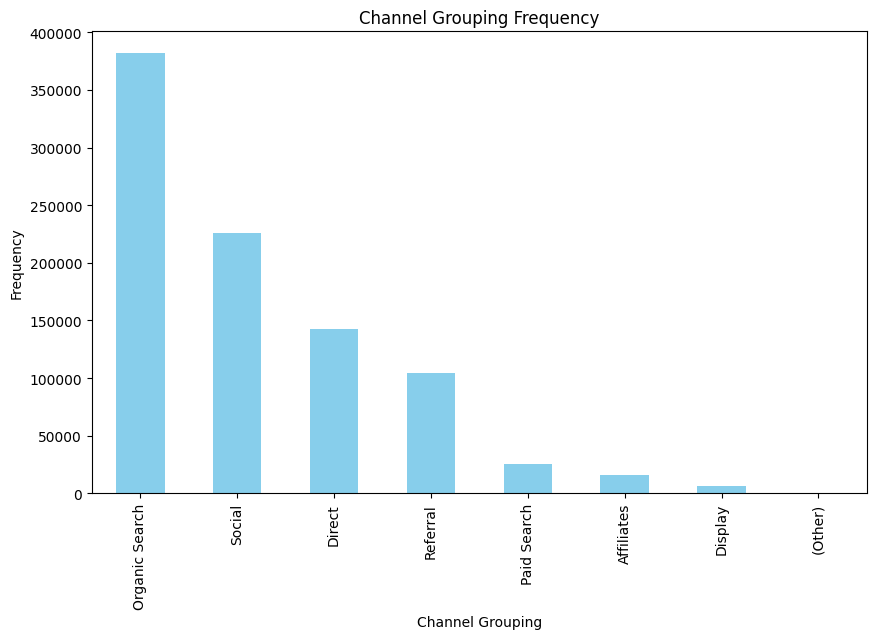

In [65]:
import matplotlib.pyplot as plt

# 데이터
channel_counts = selected_df['channelGrouping'].value_counts()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
channel_counts.plot(kind='bar', color='skyblue')

# 그래프 제목과 축 라벨 설정
plt.title('Channel Grouping Frequency')
plt.xlabel('Channel Grouping')
plt.ylabel('Frequency')

# 그래프 출력
plt.show()

### geoNetwork_country 기준 막대그래프

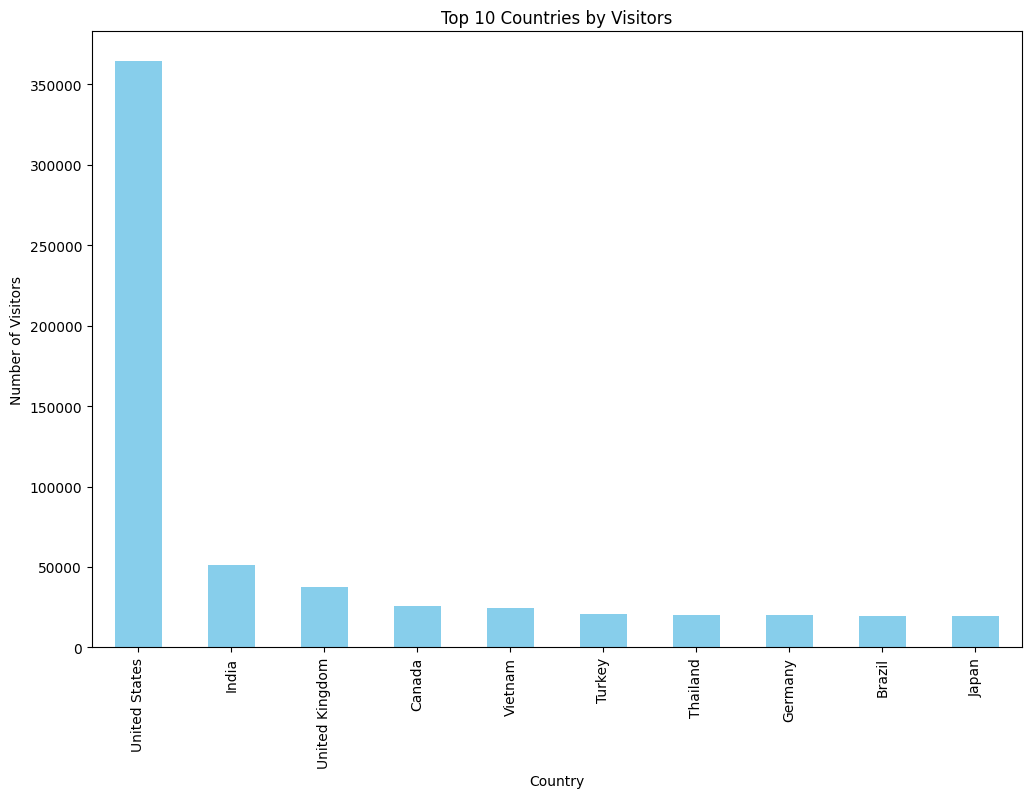

In [66]:
import matplotlib.pyplot as plt
# 데이터
country_counts = selected_df['geoNetwork_country'].value_counts()

# 상위 10개 국가만 선택
top_countries = country_counts.head(10)

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
top_countries.plot(kind='bar', color='skyblue')

# 그래프 제목과 축 라벨 설정
plt.title('Top 10 Countries by Visitors')
plt.xlabel('Country')
plt.ylabel('Number of Visitors')

# 그래프 출력
plt.show()

### 미국이 압도적으로 많아서 continent 기준으로 다시 막대 그래프

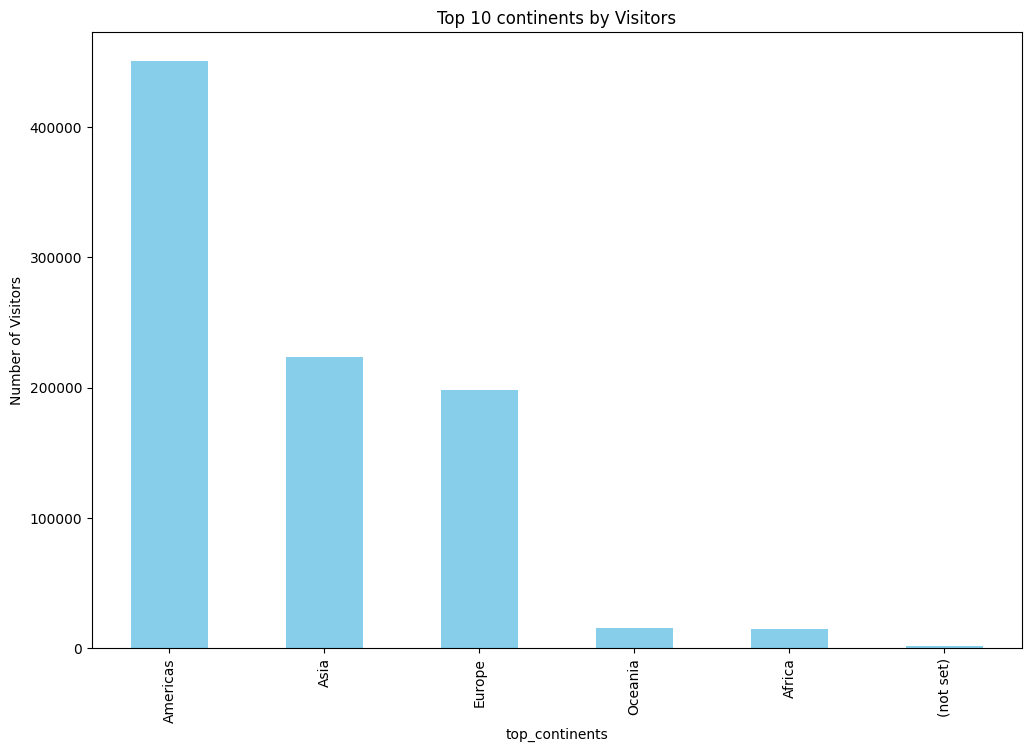

In [67]:
# 데이터
country_counts = selected_df['geoNetwork_continent'].value_counts()

# 상위 10개 국가만 선택
top_continents = country_counts.head(10)

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
top_continents.plot(kind='bar', color='skyblue')

# 그래프 제목과 축 라벨 설정
plt.title('Top 10 continents by Visitors')
plt.xlabel('top_continents')
plt.ylabel('Number of Visitors')

# 그래프 출력
plt.show()